# 1. BFS (Busca em Largura / Breadth-First Search)
---

## 🚚 Problema Simulado: Expansão de Zonas de Entrega
Imagine que uma empresa de logística inaugurou um novo **Centro de Distribuição (CD)** em Belém. O gerente de operações precisa responder às seguintes perguntas para definir o frete:
1.  Quais cidades são vizinhas imediatas (Zona 1)?
2.  Quais cidades exigem passar por um intermediário (Zona 2)?
3.  Qual é o número mínimo de "saltos" (conexões) para atingir qualquer cliente na rede?

O BFS é o algoritmo ideal para isso, pois ele explora o grafo em **camadas** (ou ondas), garantindo que visitamos todos os nós a uma distância $k$ antes de visitar qualquer nó a uma distância $k+1$.

## ⚙️ Conceito do Algoritmo
O BFS funciona utilizando uma estrutura de dados do tipo **Fila (Queue)** — *First-In, First-Out*.
1.  Começamos no nó raiz (Cidade de Origem) e o marcamos como visitado.
2.  Colocamos esse nó na fila.
3.  Enquanto a fila não estiver vazia:
    * Removemos o primeiro nó da fila.
    * Visitamos todos os seus vizinhos não visitados.
    * Adicionamos esses vizinhos na fila e registramos sua "distância" (camada).

---

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque # Fila otimizada para BFS

# --- 1. DEFINIÇÃO DO GRAFO (REDE LOGÍSTICA) ---
# Representação: Lista de Adjacência (Dicionário) - Para os nossos nós.
# Cenário: Um Centro de Distribuição (A) e seus bairros conectados.
# Temos 16 vértices (A até P).
rede_logistica = {
    'A': ['B', 'C', 'D'],      # CD Central conecta nas Zonas B, C, D
    'B': ['A', 'E', 'F'],      # Zona B conecta em E, F
    'C': ['A', 'G'],           # Zona C conecta em G
    'D': ['A', 'H', 'I'],      # Zona D conecta em H, I
    'E': ['B', 'J'],           # E conecta em J
    'F': ['B', 'K'],           # F conecta em K
    'G': ['C', 'L'],           # ... e assim por diante
    'H': ['D', 'M'],
    'I': ['D', 'N'],
    'J': ['E', 'O'],
    'K': ['F', 'P'],
    'L': ['G'],                # Pontas da rede (Bairros afastados)
    'M': ['H'],
    'N': ['I'],
    'O': ['J'],
    'P': ['K']
}

In [ ]:
# --- 2. ALGORITMO BFS ---
def bfs_zonas_entrega(grafo, inicio):
    """
    Executa a Busca em Largura para mapear as zonas de entrega.
    Retorna: Um dicionário onde Chave = Nível (Distância) e Valor = Lista de Cidades.
    """
    visitados = set()           # Conjunto para rastrear nós já visitados
    fila = deque([inicio])      # Fila para controlar a ordem de visita
    visitados.add(inicio)       
    
    # Dicionário para guardar a distância de cada nó (Nível 0, 1, 2...)
    distancias = {inicio: 0}
    
    # Dicionário para organizar o resultado por zonas: {0: ['A'], 1: ['B', 'C']...}
    zonas = {0: [inicio]}
    
    print(f"--- Iniciando BFS a partir do CD: {inicio} ---")
    
    while fila:
        vertice_atual = fila.popleft() # Remove o primeiro da fila
        nivel_atual = distancias[vertice_atual]
        
        # Explora os vizinhos
        for vizinho in grafo.get(vertice_atual, []):
            if vizinho not in visitados:
                visitados.add(vizinho)
                fila.append(vizinho)
                
                # Calcula a distância (Nível do pai + 1)
                distancia_vizinho = nivel_atual + 1
                distancias[vizinho] = distancia_vizinho
                
                # Organiza no relatório de zonas
                if distancia_vizinho not in zonas:
                    zonas[distancia_vizinho] = []
                zonas[distancia_vizinho].append(vizinho)
                
                # Log didático para ver acontecendo
                print(f"Visitando {vizinho} (Zona {distancia_vizinho}) vindo de {vertice_atual}")
    
    return distancias, zonas

In [6]:
# --- 3. VISUALIZAÇÃO GRÁFICA ---
def desenhar_grafo_bfs(grafo_dict, distancias):
    G = nx.Graph(grafo_dict)
    
    # Define posições fixas ou automáticas para o desenho
    pos = nx.spring_layout(G, seed=42) 
    
    # Define cores baseadas na distância (Heatmap)
    # CD (0) = Vermelho, Perto = Laranja/Amarelo, Longe = Azul/Roxo
    valores_cores = [distancias.get(node, 0) for node in G.nodes()]
    
    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, 
        with_labels=True, 
        node_color=valores_cores, 
        cmap=plt.cm.coolwarm_r, # Mapa de cores (Quente para perto, Frio para longe)
        node_size=2000, 
        font_size=12, 
        font_weight='bold',
        edge_color='gray'
    )
    plt.title("Mapeamento de Zonas de Entrega (BFS Visualization)", fontsize=15)
    plt.show()

--- Iniciando BFS a partir do CD: A ---
Visitando B (Zona 1) vindo de A
Visitando C (Zona 1) vindo de A
Visitando D (Zona 1) vindo de A
Visitando E (Zona 2) vindo de B
Visitando F (Zona 2) vindo de B
Visitando G (Zona 2) vindo de C
Visitando H (Zona 2) vindo de D
Visitando I (Zona 2) vindo de D
Visitando J (Zona 3) vindo de E
Visitando K (Zona 3) vindo de F
Visitando L (Zona 3) vindo de G
Visitando M (Zona 3) vindo de H
Visitando N (Zona 3) vindo de I
Visitando O (Zona 4) vindo de J
Visitando P (Zona 4) vindo de K

Relatório de Logística (Expansão):
📍 Zona 0 (Distância 0 saltos): ['A']
📍 Zona 1 (Distância 1 saltos): ['B', 'C', 'D']
📍 Zona 2 (Distância 2 saltos): ['E', 'F', 'G', 'H', 'I']
📍 Zona 3 (Distância 3 saltos): ['J', 'K', 'L', 'M', 'N']
📍 Zona 4 (Distância 4 saltos): ['O', 'P']

Gerando visualização gráfica...


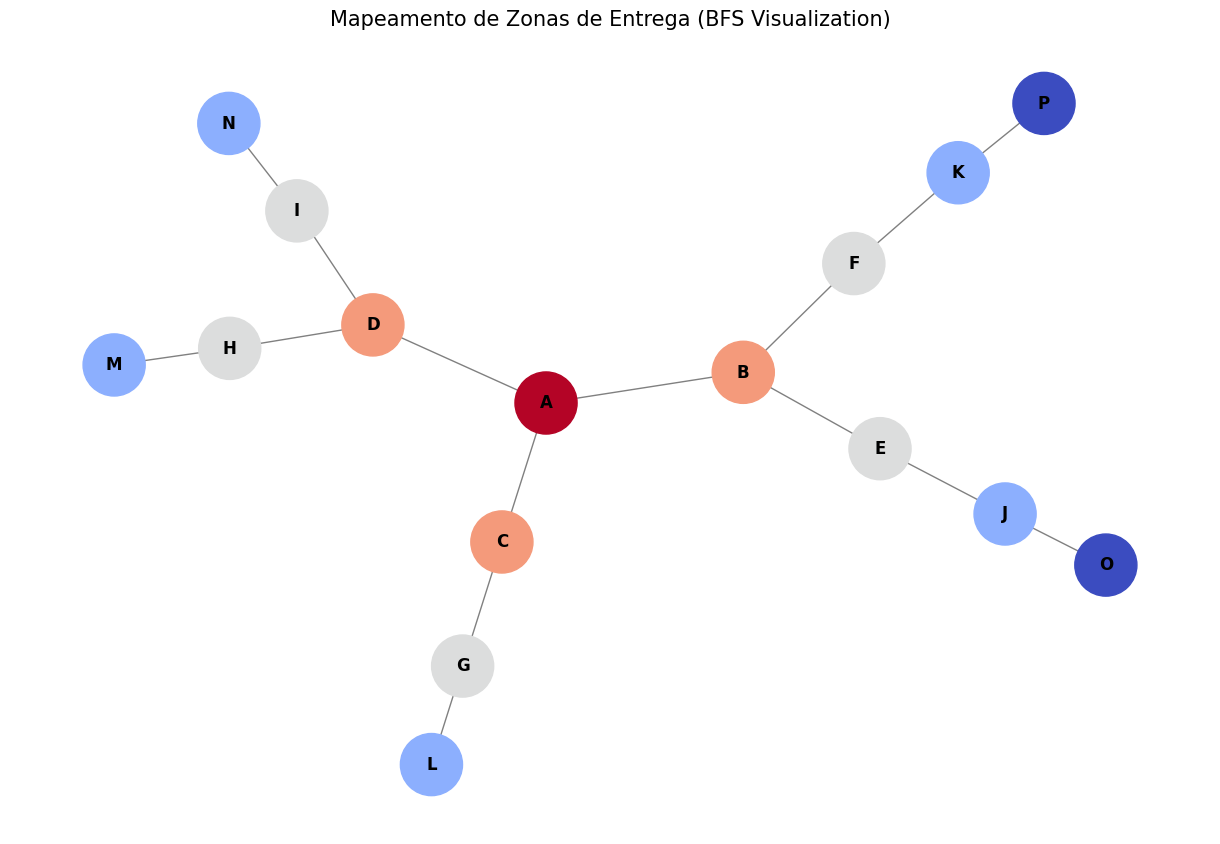

In [7]:
# --- 4. EXECUÇÃO DO TESTE ---

# Rodando o algoritmo
cd_central = 'A'
mapa_distancias, relatorio_zonas = bfs_zonas_entrega(rede_logistica, cd_central)

# Mostrando o Relatório
print("\nRelatório de Logística (Expansão):")
for zona, cidades in relatorio_zonas.items():
    print(f"📍 Zona {zona} (Distância {zona} saltos): {cidades}")

# Gerando o Gráfico
print("\nGerando visualização gráfica...")
desenhar_grafo_bfs(rede_logistica, mapa_distancias)